### Med 4: acero inox 18.5 cm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
from scipy.fft import fft, fftfreq
import pandas as pd 
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [2]:
file_path = "C:/Users/FIUBA/Desktop/Labo 4/mod young/mediciones24-2/med4-24-2-acero-inoxidable-18-5cm0.csv"
df = pd.read_csv(file_path)

df.columns = ["t","V"]

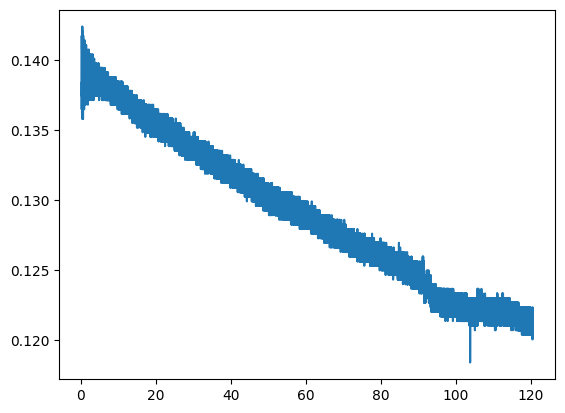

In [4]:
plt.plot(df["t"], df["V"])

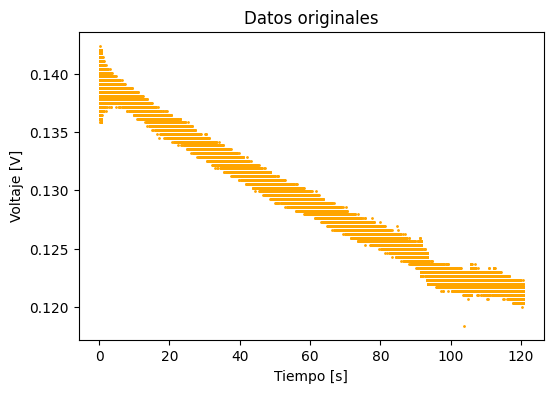

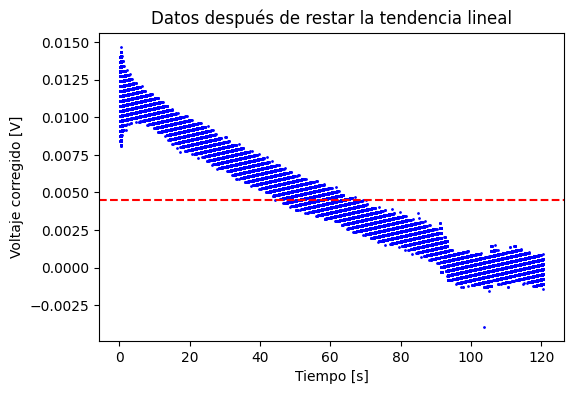

Ecuación de la recta ajustada: V(t) = -0.000052 * t + 0.127711
mean: 0.004518949108916477


In [3]:
plt.figure(figsize=(6, 4))
plt.plot(df["t"], df["V"], '.', markersize=2, color="orange")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Datos originales")
plt.show()

# Seleccionar los últimos puntos para el ajuste lineal (por ejemplo, últimos 20% de los datos)
fraction = 0.2
n_points = int(len(df) * fraction)
df_tail = df.iloc[-n_points:]

# Ajuste lineal (mínimos cuadrados)
p = np.polyfit(df_tail["t"], df_tail["V"], 1)  # p[0] es la pendiente, p[1] es la intersección

# Crear la recta ajustada
recta_ajustada = np.polyval(p, df["t"])

# Restar la recta ajustada a los datos originales
df["V1_corregido"] = df["V"] - recta_ajustada

plt.figure(figsize=(6, 4))
plt.plot(df["t"], df["V1_corregido"], '.', markersize=2, color="blue")
plt.axhline(np.mean(df["V1_corregido"]), color='red', linestyle='--', label="Media")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje corregido [V]")
plt.title("Datos después de restar la tendencia lineal")
plt.show()

# Mostrar la ecuación de la recta ajustada
print(f"Ecuación de la recta ajustada: V(t) = {p[0]:.6f} * t + {p[1]:.6f}")
print(f"mean: {np.mean(df['V1_corregido'])}")